## Visualize before-after samples

This notebook can be used to visualize samples from a change detection dataset created with script *create_deforestation_detection_dataset.py*.
The following code assumes that the working directory is the root (i.e. the directory from where the notebook code is executed) is the root directory of this repo.  

**Note**: the **GOOGLE_APPLICATION_CREDENTIALS** must be set to access the bucket on GCS.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ee
ee.Initialize()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load dataset
from data.dataset import get_dataset
bucket = "ai4good-3b"
file_pattern = "deforest-training_sampling_rectangles_1_20201001_20201031_scale-40/*.tfrecord.gz"
dataset = get_dataset(bucket=bucket, file_pattern=file_pattern)

In [6]:
# Extract one sample
inputs, outputs = next(iter(dataset.take(1)))

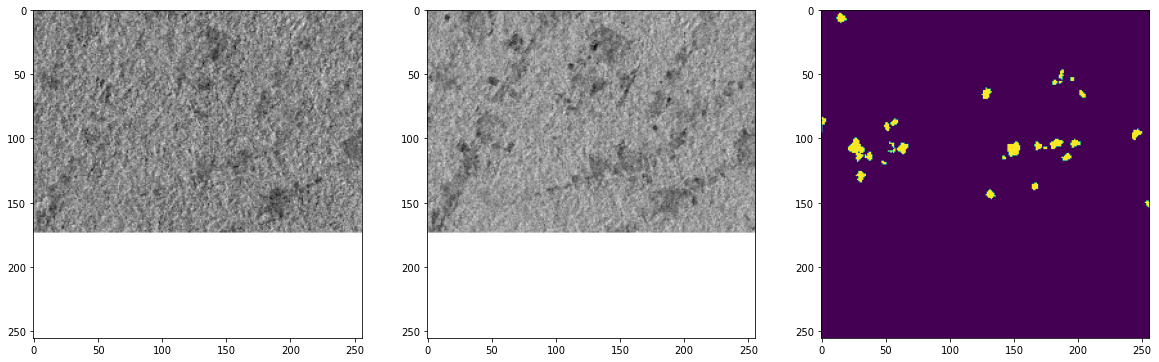

In [11]:
from PIL import Image
from IPython.display import display
from utils.visualization import mso_to_rgb, mask_to_grayscale, sar_to_rgb, sar_to_grayscale

sar_before_gray = sar_to_grayscale(inputs[:, :, 0:2].numpy())
sar_after_gray = sar_to_grayscale(inputs[:, :, 2:4].numpy())
mso_rgb = mso_to_rgb(inputs[:, :, -3:].numpy())
mask_gray = mask_to_grayscale(outputs.numpy().squeeze(axis=2))

masked_mso_rgb = np.copy(mso_rgb)
masked_mso_rgb[mask_gray == 255] = [255, 255, 255]


plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(sar_before_gray, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(sar_after_gray, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(mask_gray)